In [47]:
import sys
import types
import cv2
import numpy as np
from io import StringIO ## for Python 3
from urllib.request import urlopen

def load_code_from_url(url_path):
  code_str = urlopen(url_path).read()
  code_str = code_str.decode('utf-8')
  return code_str

code_str = load_code_from_url("https://raw.githubusercontent.com/hoat23/VisionArtificialAndImageProcessing/master/bin/utils_imgprocessing.py")
exec(code_str)

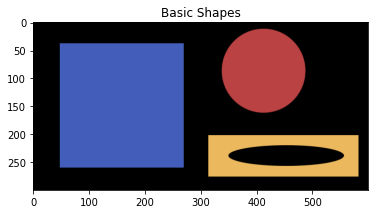

In [48]:
#url_img = "https://raw.githubusercontent.com/hoat23/VisionArtificialAndImageProcessing/master/img/img_02.jpg"
url_img = "https://raw.githubusercontent.com/hoat23/VisionArtificialAndImageProcessing/master/img/img_10_basic_shapes.png"
img_orig = load_image_from_url(url_img)
plot_img(img_orig,title="Basic Shapes")

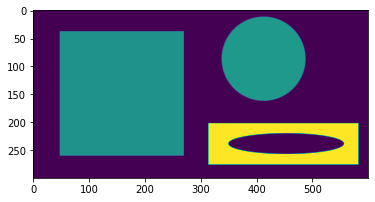

In [49]:
# Converting image to gray
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)
plot_img(img_gray)

Found 4 contours:
 - Area_01 = 48841[px2]
 - Area_02 = 19564[px2]
 - Area_03 = 17687[px2]
 - Area_04 = 05972[px2]


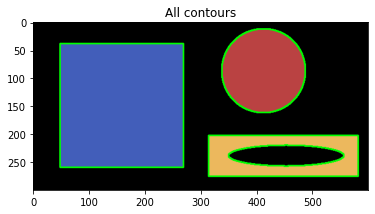

In [50]:
# GET ALL CONTOURS
img_work = img_gray.copy()
clone = img_orig.copy()
cnts = cv2.findContours(img_work, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
cv2.drawContours(clone, cnts, -1, (0,255,0), 2)
print("Found {} contours:".format(len(cnts)))
for i,cnt in enumerate(cnts):
  print(" - Area_{0:02d} = {1:05.0f}[px2]".format( i+1,cv2.contourArea(cnt) ) )

plot_img(clone, title="All contours")

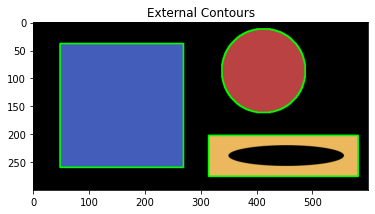

In [51]:
# GET EXTERNAL CONTOURS
img_work = img_gray
clone = img_orig
cnts = cv2.findContours(img_work, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
cv2.drawContours(clone, cnts, -1, (0,255,0), 2)
plot_img(clone, title="External Contours")

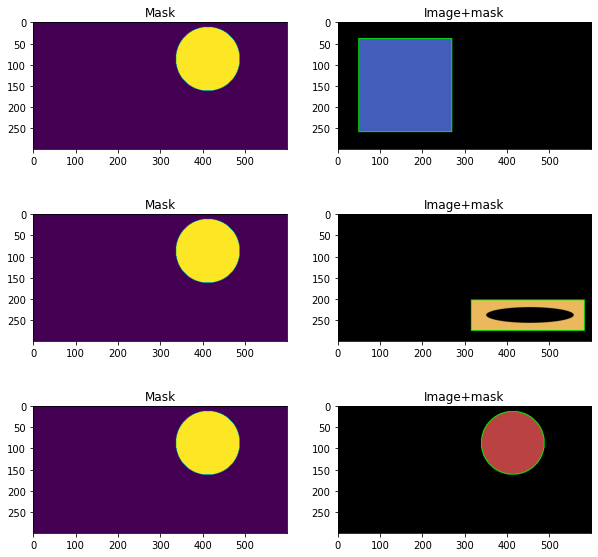

In [66]:
# CONTOURS AND MASK
clone = img_orig.copy()
img_work = img_gray.copy()
fig=plt.figure(figsize=(10, 10))
rows = 3; columns = 2;
for (i,c) in enumerate(cnts):
    _ = np.zeros(img_work.shape, dtype='uint8')
    mask = cv2.drawContours(_, [c], -1, 255, -1)
    img_filtered = cv2.bitwise_and(clone, clone, mask=mask)
    create_subplot(fig, rows, columns, 2*i+1,img_mask, title="Mask")
    create_subplot(fig, rows, columns, 2*i+2, img_filtered, title="Image+mask")